## Homework 1

A satellite is to be launched into a circular orbit around the earth so that it orbits the planet every T seconds.

The equation for the period of an orbit is T = sqrt((4pi^2r^3)/(G*M))

We are looking to solve for the height of the satellite based on a given T, since the radius in the equation consists of the radius of earth plus the height H, we can replace r^3 with (earth_radius + h).

Solving for h we get the equation h = (GMT^2/4pi^2)^(1/3) - R

In [1]:
import numpy as np


def orbit_calc():
    G= 6.67e-11
    M= 5.97e+24
    R = 6.371e+6
    
    T= float(input("How frequently does the satellite complete its orbit?(in seconds)"))
    
    h=np.cbrt((G*M*T**2)/(4*np.pi**2)) - R

    out = "The satellite is aproximately %.1f meters from earth's surface." %h
    return out


In [2]:
#solving for a satellite orbiting once every 90 minutes(5400 seconds)
orbit_calc()


How frequently does the satellite complete its orbit?(in seconds)5400


"The satellite is aproximately 279321.6 meters from earth's surface."

In [3]:
#solving for a satellite orbiting once every 45 minutes(2700 seconds)
orbit_calc()

How frequently does the satellite complete its orbit?(in seconds)2700


"The satellite is aproximately -2181559.9 meters from earth's surface."

it would appear based on the negative value that the satellite of such a short period would be beneath the earth's surface in the previous calulation.

1.d)Technically a geosynchronous satellite is one that orbits the earth once per sidereal day which is 23.93 hours, not 24 hours.  Why is this and how much difference will it make to the satellite?

The earth's rotation takes 24 hours in relation to the sun, for it to move from its peak each day to the next peak.  However because the earth is orbiting the sun it takes just a little more time for it to catch up, which means it finishes its rotation relative to the stars slightly faster at 23.93 hours.


In [4]:
24*60*60

86400

In [5]:
23.93*60*60

86148.0

In [6]:
orbit_calc()

How frequently does the satellite complete its orbit?(in seconds)86400


"The satellite is aproximately 35855910.2 meters from earth's surface."

In [7]:
orbit_calc()

How frequently does the satellite complete its orbit?(in seconds)86148


"The satellite is aproximately 35773762.3 meters from earth's surface."

In [8]:
round(35855910.2-35773762.3,1)

82147.9

To have a geosynchronous orbit it would need to be 82km lower.


## HW 2.5

"A well-known quantum mechanics problem involves a particle of mass m that encounters a one dimensional potential step, like this:"

initial KE(E) and wavevector k1 = sqrt(2mE)/hbar enters from the left and encounters a sudden jump in potential energy of height V at position x=0. The particle may either: a) pass the step, in which case it has a lower potential energy of E-V on the other side and a correspondingly lower wavevector k2=sqrt(2m(E-V))/hbar or b)it may be reflected, keeping all of its kinetic energy and an unchanged wavevector but moving in the opposite direction. The probabilitites T and R for transmission and reflection are given by: T = 4k1*k2/(k1+k2)^2 R =((k1-k2)/(k1+k2))^2

? suppose a particle with mass m=9.11e-31 and E = 10eV encountering a potential step of height 9eV.

In [9]:
def tr_probs(M,E,V):
    hbar = 6.582119569e-16
    k1=np.sqrt(2*M*E)/hbar
    k2=np.sqrt(2*M*(E-V))
    T = (4*k1*k2)/pow((k1+k2),2)
    R = pow((k1-k2)/(k1+k2),2)
    return T, R

In [10]:
print(tr_probs(9.11e-31,10,9))

(8.325795867842324e-16, 0.9999999999999989)


## HW 2.10


The semi-empirical mass formula for calculating the approximate nuclear binding energy B of an atomic nucleus with atomic number Z and mass number A:

B =a1A-a2A^(2/3)-a3(Z^2/A^1/3)-a4(A-2Z)^2/A + a5/A^(1/2) units of MeV

a1 = 15.8, a2 = 18.3, a3 = .714, a4 = 23.2 and

if a%2==0 and z%2 ==0 then a5 = 12 if a%2==0 and z%2 !=0 then a5 = -12 else a5 = 0


a) write a program that takes the values A and Z and the prints the binding energy for the corresponding atom. Use the program to find the binding energy of an atom with A = 58 and Z=28(hint the correct answer is around 500MeV)


In [11]:
def bind_energy(A,Z):
    a1=15.8
    a2=18.3
    a3=0.714
    a4=23.2
    
    if A%2 ==0 and Z%2 ==0:
        a5 = 12.0
    elif A%2==0 and Z%2 !=0:
        a5 = -12.0
    else:
        a5 = 0.0
       
    B = a1*A-(a2*(pow(A,(2/3))))-(a3*(Z**2)/(A**(1/3)))-(a4*pow((A-2*Z),2)/A) + (a5/A**(1/2))
    return B

In [12]:
print(bind_energy(58.0,28.0))

497.5620206224374


(b) Modify your program to print out not the total binding energy B, but the binding energy per nucleon,
which is B/A

In [13]:
def bind_energy2(A,Z):
    a1=15.8
    a2=18.3
    a3=0.714
    a4=23.2
    
    if A%2 ==0 and Z%2 ==0:
        a5 = 12.0
    elif A%2==0 and Z%2 !=0:
        a5 = -12.0
    else:
        a5 = 0.0
       
    B = a1*A-(a2*(pow(A,(2/3))))-(a3*(Z**2)/(A**(1/3)))-(a4*pow((A-2*Z),2)/A) + (a5/A**(1/2))
    return B/A

In [14]:
print(bind_energy2(58.0,28.0))

8.578655527973059


(c) Now modify your program so that it takes as input just a single value of the atomic number Z and then
goes through all values of A from A = Z to A = 3Z, to find the one that has the largest binding energy
per nucleon. This is the most stable nucleus with the given atomic number. Have your program print out
the value of A for this most stable nucleus and the value of the binding energy per nucleon.


In [19]:
def stable_nucleus(Z):
    Z = int(Z)
    A=Z
    A2= Z*3
    current = -1000
    N = A
    for x in range(A,(A2+1)):
        bn = bind_energy2(x,Z)
        if bn>=current:
            current = bn
            if x<(2*A):
                N=x
            else:
                pass
    
    return current, N
        

In [22]:
x=input("Enter a value for Z for the bind energy most stable nucleus with that atomic number ")
y,z = stable_nucleus(x)
print("The most stable nucleus with atomic number %i has an atomic mass of % a bind energy of %.4f mEv" %(int(x),z,y))

Enter a value for Z for the bind energy most stable nucleus with that atomic number 28
The most stable nucleus with atomic number 28 has an atomic mass of 55 bind energy of 8.7025 mEv


(d) Modify your program again so that, instead of taking Z as input, it runs through all values of Z from 1 to
100 and then prints out the most stable value of A for each one. At which value of Z does the maximum
binding energy per nucleon occur? (The true answer, in real life, is Z = 28, which is nickel.)

In [56]:
def most_stable():
    current_z=0
    energy= -1000
    for x in range(1,101):
        y,z = stable_nucleus(x)
        if y >= energy:
            current_z = x
            energy = y
    energy, mass = stable_nucleus(current_z)
    return "The most stable nucleus with atomic number %i has an atomic mass of % a bind energy of %.4f mEv" %(current_z,mass,energy)


In [58]:
most_stable()

'The most stable nucleus with atomic number 28 has an atomic mass of 55 bind energy of 8.7025 mEv'

4. Exercise 3.1 of Newman Plotting experimental data
In the on-line resources you will find a file called sunspots.txt which contains the observed number of sunspots
on the Sun for each month since January 1749. The file contains two columns of numbers, the first being the
month and the second being the sunspot number.
(a) Write a program that reads in the data and makes a graph of sunspots as a function of time.
(b) Modify your program to display only the first 1000 data points on the graph.
(c) Modify your program further to calculate the and plot the running average of the data, defined by----


In [153]:
import matplotlib.pyplot as plt
file = "sunspots.txt"

def data_grapher(file_name):
    data = np.genfromtxt(file_name)
    size = data.shape[0]
    #primary data
    t= data[:,0]
    sunspots = data[:,1]
    #plot
    plt.xlabel("Months since January 1749")
    plt.ylabel("# of sunspots per month")
    plt.title("Sunspots per month, since Jan 1749")
    plt.scatter(t,sunspots,color="purple")
    
    
        

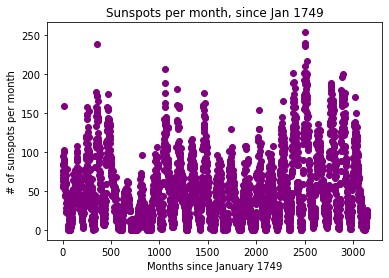

In [154]:
data_grapher(file)

In [155]:
def data_grapher(file_name):
    data = np.genfromtxt(file_name)
    size = 1000
    #primary data
    t= data[:size,0]
    sunspots = data[:size,1]
    #plot
    plt.xlabel("Months since January 1749")
    plt.ylabel("# of sunspots per month")
    plt.title("Sunspots per month, since Jan 1749")
    plt.scatter(t,sunspots,color="purple")
    
    

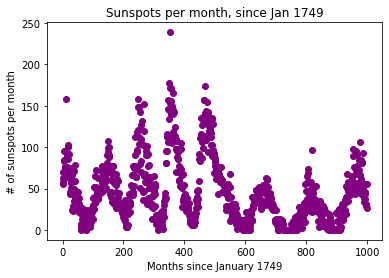

In [156]:
data_grapher(file)

In [157]:
def data_grapher(file_name):
    data = np.genfromtxt(file_name)
    size = 1000
    #primary data
    t= data[:size,0]
    sunspots = data[:size,1]
    
    y=np.zeros(size+1)
    x= np.linspace(0,size+1,size+1)
    y[0:6]=sunspots[0:6]
    r=5
    for i in range(5,size+1):
        start = i-r
        end = i+r
        y[i] = np.average(sunspots[start:end])
        
    

    plt.xlabel("Months since January 1749")
    plt.ylabel("# of sunspots per month")
    plt.title("Sunspots per month, since Jan 1749")
    plt.scatter(t,sunspots,color="purple")
    plt.plot(x,y)

    

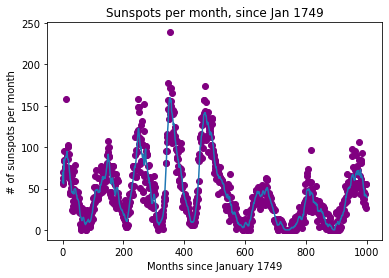

In [158]:
data_grapher(file)

5. Exercise 3.3 of Newman
There is a file in the on-line resources called stm.txt, which contains a grid of values from scanning tunneling
microscope (STM) measurements of the (111) surface of silicon. An STM is a device that measures the shape
of a surface at the atomic level by tracking a sharp tip over the surface and measuring quantum tunneling
current as a function of position. The end result is a grid of values that represent the height of the surface and
the file stm.txt contains just such a grid of values. Write a program that reads the data contained in the file
and makes a density plot of the values. Use the various options and variants you have learned about to make
a picture that shows the structure of the silicon surface clearly.

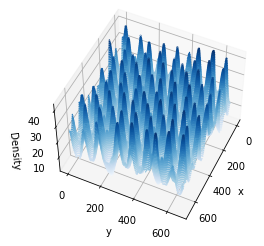

In [184]:
from mpl_toolkits import mplot3d

#find file
file2 = "stm.txt"
data = np.genfromtxt(file2)

#Create an x and y grid of the correct size
x = np.linspace(0, data.shape[1], data.shape[1])
y = np.linspace(0, data.shape[0], data.shape[0])
X, Y = np.meshgrid(x, y)

#creating a 3d contour plot
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, data, 50, cmap='Blues')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Density');
ax.view_init(50, 25)


In [ ]:
print(data.shape)